<a href="https://colab.research.google.com/github/CharlesPrado23/Bootcamp_TurmaNoite/blob/main/Conteudo_03(SQL)/SQL_Aula(blank).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

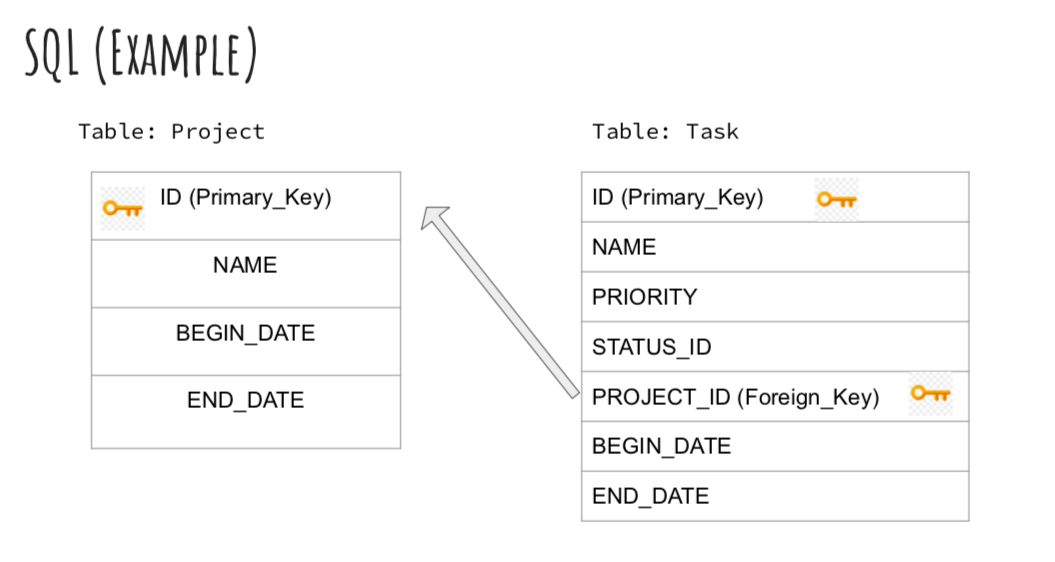

In [1]:
import sqlite3
engine = sqlite3.connect('sql.db')

In [2]:
cursor = engine.cursor()

cursor.execute("PRAGMA foreign_keys = ON").fetchall()

### cursor.execute("PRAGMA foreign_keys").fetchall()

[]

### Syntax:
### "CREATE [TEMP | TEMPORARY] TABLE table-name (
### column-def[, column-def]
### [,constraint]);

### column-def:
### name [type] [[CONSTRAINT name] column-constraint]"

In [3]:
sql_create_projects_table = 'CREATE TABLE IF NOT EXISTS projects (\
                                        id integer PRIMARY KEY,\
                                        name text NOT NULL,\
                                        begin_date text,\
                                        end_date text\
                                    )'

In [4]:
sql_create_tasks_table = """CREATE TABLE IF NOT EXISTS tasks (
                                    id integer PRIMARY KEY,
                                    name text NOT NULL,
                                    priority integer,
                                    status_id integer NOT NULL,
                                    project_id integer NOT NULL REFERENCES projects (id),
                                    begin_date text NOT NULL,
                                    end_date text NOT NULL
                                );"""
# StudentId INT REFERENCES Student (StudentId)
#FOREIGN KEY (project_id) REFERENCES projects (id)

In [5]:
### Command execute #####
cursor.execute(sql_create_projects_table)

In [6]:
#### Types de cada atributo da Tabela #######
#### Comando PRAGMA table_info("Nome da tabela")
cursor.execute('PRAGMA table_info(projects)').fetchall()

[(0, 'id', 'INTEGER', 0, None, 1),
 (1, 'name', 'TEXT', 1, None, 0),
 (2, 'begin_date', 'TEXT', 0, None, 0),
 (3, 'end_date', 'TEXT', 0, None, 0)]

In [7]:
data = cursor.execute('PRAGMA table_info(projects)').fetchall()
print(type(data[0]))
for d in data:
  print(d[0],d[1],d[2])

<class 'tuple'>
0 id INTEGER
1 name TEXT
2 begin_date TEXT
3 end_date TEXT


In [8]:
cursor.execute(sql_create_tasks_table)

In [9]:
## Retorna os tipos da tabela Tasks ###

cursor.execute('PRAGMA table_info(task)').fetchall()

In [10]:
cursor.execute('PRAGMA table_info(tasks)').fetchall()
###primeiro 0 significa que não tem NOT NULL
###Segundo None se existe um valor the full ex(for the full colocar 100), ou seja, se não tiver nada coloca 100
### se é chave primaria

[(0, 'id', 'INTEGER', 0, None, 1),
 (1, 'name', 'TEXT', 1, None, 0),
 (2, 'priority', 'INTEGER', 0, None, 0),
 (3, 'status_id', 'INTEGER', 1, None, 0),
 (4, 'project_id', 'INTEGER', 1, None, 0),
 (5, 'begin_date', 'TEXT', 1, None, 0),
 (6, 'end_date', 'TEXT', 1, None, 0)]

## SYNTAX (INSERT):

### "INSERT [OR conflict-algorithm]
### INTO [database-name .] table-name [(column-list)]
### VALUES (value-list)"

In [11]:
### Comando Insert #####
### INSERT INTO table VALUES ()
### INSERT INTO table (columns) VALUES ()


In [12]:
sql_insert = 'INSERT INTO projects VALUES(20,"PROJETO_01","2021-07-18"," ")'
cursor.execute(sql_insert)

In [13]:
sql_insert2 = 'INSERT INTO projects (name,begin_date,end_date) VALUES("PROJETO_02"," ", " ")'
cursor.execute(sql_insert2)


In [14]:
sql_insert3 = 'INSERT INTO projects (name) VALUES("PROJETO_03")'
cursor.execute(sql_insert3)


In [15]:
 #### Comando SELECT #####
 ###. SELECT * FROM table #####
sql_select = 'SELECT * FROM projects'
cursor.execute(sql_select).fetchall()

[(20, 'PROJETO_01', '2021-07-18', ' '),
 (21, 'PROJETO_02', ' ', ' '),
 (22, 'PROJETO_03', None, None)]

In [16]:
### INSERT values into Task ######
sql_insert4 = 'INSERT INTO tasks (name, priority, status_id, project_id, begin_date, end_date) VALUES("aprender_sql", 6, 3, 20, "06-06-2023", "30-06-2023")'
cursor.execute(sql_insert4).fetchall()
engine.commit()

In [17]:
sql_select_tasks = 'SELECT * FROM tasks'
cursor.execute(sql_select_tasks).fetchall()

[(1, 'aprender_sql', 6, 3, 20, '06-06-2023', '30-06-2023')]

In [18]:
### LER os valores inseridos #######
cursor.execute('SELECT * FROM tasks').fetchall()

[(1, 'aprender_sql', 6, 3, 20, '06-06-2023', '30-06-2023')]

## SYNTAX (SELECT):

### SELECT [ALL | DISTINCT] result [FROM table-list]
### [WHERE expr]
### [GROUP BY expr-list]
### [HAVING expr]
### [compound-op select]*
### [ORDER BY sort-expr-list]
### [LIMIT integer [(OFFSET|,) integer]]

In [19]:
### CREATE TABLE EMP and DEPTO #######
cursor.execute('''CREATE TABLE IF NOT EXISTS EMP (EMPNO int, ENAME text, JOB text, MGR int, HIREDATE date, SAL real,COMM int, DEPTNO int)''')

In [20]:
data = cursor.execute("PRAGMA table_info(EMP)").fetchall()
for d in data:
    print (d[0], d[1], d[2])

0 EMPNO INT
1 ENAME TEXT
2 JOB TEXT
3 MGR INT
4 HIREDATE date
5 SAL REAL
6 COMM INT
7 DEPTNO INT


In [21]:
 employes = [(7369, 'SMITH',  'CLERK', 7902, '2005-12-11', 800, 150 , 20),
 (7499, 'ALLEN',  'SALESMAN', 7698, '2006-02-23',1600, 300, 30),
 (7521, 'WARD', 'SALESMAN', 7698,'2006-02-26', 1250, 500, 30),
 (7566, 'JONES','MANAGER', 7839,'2006-04-02', 2975, 520, 20),
 (7654, 'MARTIN','SALESMAN', 7698,'2006-09-28', 1400, 420, 30),
 (7698, 'BLAKE','MANAGER', 7839,'2006-05-1', 2850, 600, 30),
 (7782, 'CLARK', 'MANAGER', 7839, '2006-06-09',2450, 580,10),
 (7788, 'SCOTT', 'ANALYST', 7566,'2007-12-09',3000,640,20),
 (7839, 'KING','PRESIDENT','', '2006-11-17',5000,0,10),
 (7844, 'TURNER', 'SALESMAN',7698,'2006-09-13',1500,0,30),
 (7876, 'ADAMS', 'CLERK',7788, '2008-01-12',1100,50,20),
 (7900, 'JAMES', 'CLERK',7698, '2006-12-03',950,40,30),
 (7902, 'FORD', 'ANALYST',7566,'2006-12-03',3000,10,20),
 (7934, 'MILLER','CLERK',7782,'2007-01-23',1300,"",10)]

In [22]:
type(employes[0])

tuple

In [23]:
cursor.executemany('INSERT INTO EMP VALUES (?,?,?,?,?,?,?,?)', employes)


In [24]:
#### READ THE CONTENTS OF EMP TABLE
cursor.execute('SELECT * FROM EMP').fetchall()

[(7369, 'SMITH', 'CLERK', 7902, '2005-12-11', 800.0, 150, 20),
 (7499, 'ALLEN', 'SALESMAN', 7698, '2006-02-23', 1600.0, 300, 30),
 (7521, 'WARD', 'SALESMAN', 7698, '2006-02-26', 1250.0, 500, 30),
 (7566, 'JONES', 'MANAGER', 7839, '2006-04-02', 2975.0, 520, 20),
 (7654, 'MARTIN', 'SALESMAN', 7698, '2006-09-28', 1400.0, 420, 30),
 (7698, 'BLAKE', 'MANAGER', 7839, '2006-05-1', 2850.0, 600, 30),
 (7782, 'CLARK', 'MANAGER', 7839, '2006-06-09', 2450.0, 580, 10),
 (7788, 'SCOTT', 'ANALYST', 7566, '2007-12-09', 3000.0, 640, 20),
 (7839, 'KING', 'PRESIDENT', '', '2006-11-17', 5000.0, 0, 10),
 (7844, 'TURNER', 'SALESMAN', 7698, '2006-09-13', 1500.0, 0, 30),
 (7876, 'ADAMS', 'CLERK', 7788, '2008-01-12', 1100.0, 50, 20),
 (7900, 'JAMES', 'CLERK', 7698, '2006-12-03', 950.0, 40, 30),
 (7902, 'FORD', 'ANALYST', 7566, '2006-12-03', 3000.0, 10, 20),
 (7934, 'MILLER', 'CLERK', 7782, '2007-01-23', 1300.0, '', 10)]

In [25]:
cursor.execute('''CREATE TABLE IF NOT EXISTS DEPT
             (DEPTNO int not null, DNAME  text, LOC text)''')

In [26]:
depts = [(10,'ACCOUNTING','NEW YORK'),
         (20,'RESEARCH','DALLAS'),
         (30,'SALES','CHICAGO'),
         (40,'OPERATIONS','BOSTON')]


In [27]:
type(depts)

list

In [28]:
cursor.executemany('INSERT INTO DEPT VALUES (?,?,?)', depts)

In [29]:
cursor.execute('SELECT * FROM DEPT').fetchall()

[(10, 'ACCOUNTING', 'NEW YORK'),
 (20, 'RESEARCH', 'DALLAS'),
 (30, 'SALES', 'CHICAGO'),
 (40, 'OPERATIONS', 'BOSTON')]

In [30]:
### SELECT - Filtrando por atributos (Colunas) #####
sql_emp = 'SELECT EMPNO, JOB FROM EMP'
cursor.execute(sql_emp).fetchall()

[(7369, 'CLERK'),
 (7499, 'SALESMAN'),
 (7521, 'SALESMAN'),
 (7566, 'MANAGER'),
 (7654, 'SALESMAN'),
 (7698, 'MANAGER'),
 (7782, 'MANAGER'),
 (7788, 'ANALYST'),
 (7839, 'PRESIDENT'),
 (7844, 'SALESMAN'),
 (7876, 'CLERK'),
 (7900, 'CLERK'),
 (7902, 'ANALYST'),
 (7934, 'CLERK')]

In [31]:
cursor.execute('PRAGMA table_info(emp)').fetchall()

[(0, 'EMPNO', 'INT', 0, None, 0),
 (1, 'ENAME', 'TEXT', 0, None, 0),
 (2, 'JOB', 'TEXT', 0, None, 0),
 (3, 'MGR', 'INT', 0, None, 0),
 (4, 'HIREDATE', 'date', 0, None, 0),
 (5, 'SAL', 'REAL', 0, None, 0),
 (6, 'COMM', 'INT', 0, None, 0),
 (7, 'DEPTNO', 'INT', 0, None, 0)]

In [32]:
cursor.description

(('cid', None, None, None, None, None, None),
 ('name', None, None, None, None, None, None),
 ('type', None, None, None, None, None, None),
 ('notnull', None, None, None, None, None, None),
 ('dflt_value', None, None, None, None, None, None),
 ('pk', None, None, None, None, None, None))

In [33]:
### Retrieving a Subset of Rows from a Table ####
#### SELECT xxxx FROM TABLE Where clause ####
sql_sub = 'SELECT ENAME FROM EMP WHERE DEPTNO <30'
cursor.execute(sql_sub).fetchall()

[('SMITH',),
 ('JONES',),
 ('CLARK',),
 ('SCOTT',),
 ('KING',),
 ('ADAMS',),
 ('FORD',),
 ('MILLER',)]

In [34]:
### Ex 2 - Count ###
sql_selectCount = 'SELECT count(deptno) FROM emp WHERE deptno=20'
cursor.execute(sql_selectCount).fetchall()

[(5,)]

In [35]:
## Funcoes nativas do SQL - avg ###

sql_selectAVG = 'SELECT avg(sal) FROM emp'
cursor.execute(sql_selectAVG).fetchall()

[(2083.9285714285716,)]

In [36]:
sql_selectAVG = 'SELECT avg(sal) FROM emp WHERE job ="SALESMAN"'
cursor.execute(sql_selectAVG).fetchall()

[(1437.5,)]

In [37]:
### Ex 3 - DISTINCT ###
sql_distinct = 'SELECT DISTINCT job FROM emp'
cursor.execute(sql_distinct).fetchall()

[('CLERK',), ('SALESMAN',), ('MANAGER',), ('ANALYST',), ('PRESIDENT',)]

### SYNTAX (UPDATE):

### UPDATE table_name SET column_name=new_value [, ...] WHERE expression

In [38]:
### Modificar salário ->. sal = 1.10*sal  para o departamento 20 #####
sql_exercicio = 'UPDATE emp SET sal = sal*1.1 WHERE deptno=20'
cursor.execute(sql_exercicio)


In [39]:
cursor.execute('SELECT sal FROM emp WHERE deptno=20').fetchall()


[(880.0000000000001,),
 (3272.5000000000005,),
 (3300.0000000000005,),
 (1210.0,),
 (3300.0000000000005,)]

In [40]:
### Using Conditional Logic in a SELECT Statement ####
#### SELECT coluna CASE WHEN condição (sal <=2000) THEN faz alguma ação ("UNDERPAID")
###  WHEN outra condição  (sal > 4000) THEN uma outra ação ("OVERPAID")
### else executa última ação ("OK")
### end fecha a clausla do case
### AS nova_coluna from nome_tabela


In [41]:
### Using Conditional Logic in a SELECT Statement ####
sql_case = 'SELECT sal,ename, CASE WHEN sal <= 2000 THEN "UNDERPAID" WHEN sal > 4000 THEN "OVERPAID" ELSE "OK" END AS STATUS FROM emp'
cursor.execute(sql_case).fetchall()

[(880.0000000000001, 'SMITH', 'UNDERPAID'),
 (1600.0, 'ALLEN', 'UNDERPAID'),
 (1250.0, 'WARD', 'UNDERPAID'),
 (3272.5000000000005, 'JONES', 'OK'),
 (1400.0, 'MARTIN', 'UNDERPAID'),
 (2850.0, 'BLAKE', 'OK'),
 (2450.0, 'CLARK', 'OK'),
 (3300.0000000000005, 'SCOTT', 'OK'),
 (5000.0, 'KING', 'OVERPAID'),
 (1500.0, 'TURNER', 'UNDERPAID'),
 (1210.0, 'ADAMS', 'UNDERPAID'),
 (950.0, 'JAMES', 'UNDERPAID'),
 (3300.0000000000005, 'FORD', 'OK'),
 (1300.0, 'MILLER', 'UNDERPAID')]

In [42]:
cursor.execute("PRAGMA table_info(EMP)").fetchall()

[(0, 'EMPNO', 'INT', 0, None, 0),
 (1, 'ENAME', 'TEXT', 0, None, 0),
 (2, 'JOB', 'TEXT', 0, None, 0),
 (3, 'MGR', 'INT', 0, None, 0),
 (4, 'HIREDATE', 'date', 0, None, 0),
 (5, 'SAL', 'REAL', 0, None, 0),
 (6, 'COMM', 'INT', 0, None, 0),
 (7, 'DEPTNO', 'INT', 0, None, 0)]

In [43]:
### Limiting the Number of Rows Returned -> equivalente ao head() ####


In [44]:
sql_limit = 'SELECT * FROM emp LIMIT 3'
cursor.execute(sql_limit).fetchall()

[(7369, 'SMITH', 'CLERK', 7902, '2005-12-11', 880.0000000000001, 150, 20),
 (7499, 'ALLEN', 'SALESMAN', 7698, '2006-02-23', 1600.0, 300, 30),
 (7521, 'WARD', 'SALESMAN', 7698, '2006-02-26', 1250.0, 500, 30)]

In [45]:
### Returning Valores aleatórios #####

In [46]:
sql_selectRandom = 'SELECT ename,job FROM emp ORDER BY random() LIMIT 5'
cursor.execute(sql_selectRandom).fetchall()

[('JONES', 'MANAGER'),
 ('KING', 'PRESIDENT'),
 ('MILLER', 'CLERK'),
 ('ADAMS', 'CLERK'),
 ('WARD', 'SALESMAN')]

In [47]:
sql_limit = 'SELECT * FROM emp'
cursor.execute(sql_limit).fetchall()

[(7369, 'SMITH', 'CLERK', 7902, '2005-12-11', 880.0000000000001, 150, 20),
 (7499, 'ALLEN', 'SALESMAN', 7698, '2006-02-23', 1600.0, 300, 30),
 (7521, 'WARD', 'SALESMAN', 7698, '2006-02-26', 1250.0, 500, 30),
 (7566, 'JONES', 'MANAGER', 7839, '2006-04-02', 3272.5000000000005, 520, 20),
 (7654, 'MARTIN', 'SALESMAN', 7698, '2006-09-28', 1400.0, 420, 30),
 (7698, 'BLAKE', 'MANAGER', 7839, '2006-05-1', 2850.0, 600, 30),
 (7782, 'CLARK', 'MANAGER', 7839, '2006-06-09', 2450.0, 580, 10),
 (7788, 'SCOTT', 'ANALYST', 7566, '2007-12-09', 3300.0000000000005, 640, 20),
 (7839, 'KING', 'PRESIDENT', '', '2006-11-17', 5000.0, 0, 10),
 (7844, 'TURNER', 'SALESMAN', 7698, '2006-09-13', 1500.0, 0, 30),
 (7876, 'ADAMS', 'CLERK', 7788, '2008-01-12', 1210.0, 50, 20),
 (7900, 'JAMES', 'CLERK', 7698, '2006-12-03', 950.0, 40, 30),
 (7902, 'FORD', 'ANALYST', 7566, '2006-12-03', 3300.0000000000005, 10, 20),
 (7934, 'MILLER', 'CLERK', 7782, '2007-01-23', 1300.0, '', 10)]

In [48]:
## Searching for Patterns ####
## Ex1 - buscar valores dentro de um intervalo
search_patterns = 'SELECT ename, job, deptno FROM emp WHERE deptno IN(10,20)'
cursor.execute(search_patterns).fetchall()



[('SMITH', 'CLERK', 20),
 ('JONES', 'MANAGER', 20),
 ('CLARK', 'MANAGER', 10),
 ('SCOTT', 'ANALYST', 20),
 ('KING', 'PRESIDENT', 10),
 ('ADAMS', 'CLERK', 20),
 ('FORD', 'ANALYST', 20),
 ('MILLER', 'CLERK', 10)]

In [49]:
## Searching for Patterns ####
## Ex2 - substring #####
sql_selectLIKE = 'SELECT ename,job FROM emp WHERE deptno IN (20,50) AND (job LIKE "%AN%")'
cursor.execute(sql_selectLIKE).fetchall()

[('JONES', 'MANAGER'), ('SCOTT', 'ANALYST'), ('FORD', 'ANALYST')]

In [50]:
#### Order by ###
### Ascendent ###
sql_selectORDERBY = 'SELECT ename,job,sal FROM emp WHERE deptno IN (10,20) ORDER BY sal ASC'
cursor.execute(sql_selectORDERBY).fetchall()

[('SMITH', 'CLERK', 880.0000000000001),
 ('ADAMS', 'CLERK', 1210.0),
 ('MILLER', 'CLERK', 1300.0),
 ('CLARK', 'MANAGER', 2450.0),
 ('JONES', 'MANAGER', 3272.5000000000005),
 ('SCOTT', 'ANALYST', 3300.0000000000005),
 ('FORD', 'ANALYST', 3300.0000000000005),
 ('KING', 'PRESIDENT', 5000.0)]

In [51]:
### Achar datas a partir de 2000 ###

In [52]:
sql_selectHIREDATE = 'SELECT hiredate FROM emp WHERE hiredate LIKE "20%"'
cursor.execute(sql_selectHIREDATE).fetchall()

[('2005-12-11',),
 ('2006-02-23',),
 ('2006-02-26',),
 ('2006-04-02',),
 ('2006-09-28',),
 ('2006-05-1',),
 ('2006-06-09',),
 ('2007-12-09',),
 ('2006-11-17',),
 ('2006-09-13',),
 ('2008-01-12',),
 ('2006-12-03',),
 ('2006-12-03',),
 ('2007-01-23',)]

In [53]:
#### ORDER BY SUBSTRING #####
### substr( string, start, length ) #####

### length(str) - retorna o tamanho da string = número de caracteres
### length(Nicolly) = 7 ; lly - substring(Nicolly,3,2) = co

In [54]:
select_order_by_substring = 'SELECT ename FROM emp ORDER BY substr(ename,2,3)'
#select_order_by_substring = 'SELECT ename FROM emp ORDER BY ename ASC'
cursor.execute(select_order_by_substring).fetchall()


[('JAMES',),
 ('WARD',),
 ('MARTIN',),
 ('SCOTT',),
 ('ADAMS',),
 ('MILLER',),
 ('KING',),
 ('BLAKE',),
 ('CLARK',),
 ('ALLEN',),
 ('SMITH',),
 ('JONES',),
 ('FORD',),
 ('TURNER',)]

In [55]:
### selecionar nomes terminando com RK ou TH
sql_substring = 'SELECT ename FROM emp WHERE substr(ename,length(ename)-1) IN("TH","RK")'
cursor.execute(sql_substring).fetchall()

[('SMITH',), ('CLARK',)]

In [56]:
sql_cast = 'SELECT CAST(hiredate as datetime) FROM emp'
data = cursor.execute(sql_cast).fetchall()
for row in data:
  print(row)

(2005,)
(2006,)
(2006,)
(2006,)
(2006,)
(2006,)
(2006,)
(2007,)
(2006,)
(2006,)
(2008,)
(2006,)
(2006,)
(2007,)


In [57]:
type(data[0][0])

int

In [58]:
cursor.execute('SELECT * FROM emp').fetchall()

[(7369, 'SMITH', 'CLERK', 7902, '2005-12-11', 880.0000000000001, 150, 20),
 (7499, 'ALLEN', 'SALESMAN', 7698, '2006-02-23', 1600.0, 300, 30),
 (7521, 'WARD', 'SALESMAN', 7698, '2006-02-26', 1250.0, 500, 30),
 (7566, 'JONES', 'MANAGER', 7839, '2006-04-02', 3272.5000000000005, 520, 20),
 (7654, 'MARTIN', 'SALESMAN', 7698, '2006-09-28', 1400.0, 420, 30),
 (7698, 'BLAKE', 'MANAGER', 7839, '2006-05-1', 2850.0, 600, 30),
 (7782, 'CLARK', 'MANAGER', 7839, '2006-06-09', 2450.0, 580, 10),
 (7788, 'SCOTT', 'ANALYST', 7566, '2007-12-09', 3300.0000000000005, 640, 20),
 (7839, 'KING', 'PRESIDENT', '', '2006-11-17', 5000.0, 0, 10),
 (7844, 'TURNER', 'SALESMAN', 7698, '2006-09-13', 1500.0, 0, 30),
 (7876, 'ADAMS', 'CLERK', 7788, '2008-01-12', 1210.0, 50, 20),
 (7900, 'JAMES', 'CLERK', 7698, '2006-12-03', 950.0, 40, 30),
 (7902, 'FORD', 'ANALYST', 7566, '2006-12-03', 3300.0000000000005, 10, 20),
 (7934, 'MILLER', 'CLERK', 7782, '2007-01-23', 1300.0, '', 10)]

In [59]:
cursor.execute('SELECT * FROM dept').fetchall()

[(10, 'ACCOUNTING', 'NEW YORK'),
 (20, 'RESEARCH', 'DALLAS'),
 (30, 'SALES', 'CHICAGO'),
 (40, 'OPERATIONS', 'BOSTON')]

In [60]:
cursor.execute('PRAGMA table_info(emp)').fetchall()

[(0, 'EMPNO', 'INT', 0, None, 0),
 (1, 'ENAME', 'TEXT', 0, None, 0),
 (2, 'JOB', 'TEXT', 0, None, 0),
 (3, 'MGR', 'INT', 0, None, 0),
 (4, 'HIREDATE', 'date', 0, None, 0),
 (5, 'SAL', 'REAL', 0, None, 0),
 (6, 'COMM', 'INT', 0, None, 0),
 (7, 'DEPTNO', 'INT', 0, None, 0)]

In [61]:
#### SELECT
###. group by using native functions - COUNT and AVG
###  O que quero selecionar (atributos)
### Por quem quero agrupar

In [62]:
emp_per_depto = 'SELECT deptno, count(ename) FROM emp GROUP BY deptno'
cursor.execute(emp_per_depto).fetchall()

[(10, 3), (20, 5), (30, 6)]

In [63]:
emp_per_job = 'SELECT job, count(ename) FROM emp GROUP BY job'
cursor.execute(emp_per_job).fetchall()

[('ANALYST', 2),
 ('CLERK', 4),
 ('MANAGER', 3),
 ('PRESIDENT', 1),
 ('SALESMAN', 4)]

### Quero obter o resultado abaixo, no entanto os atributos são de colunas diferentes


ENAME       LOC\
----------  ----------\
CLARK        NEW YORK\
KING         NEW YORK\
MILLER       NEW YORK

In [64]:
cursor.execute('PRAGMA table_info(dept)').fetchall()

[(0, 'DEPTNO', 'INT', 1, None, 0),
 (1, 'DNAME', 'TEXT', 0, None, 0),
 (2, 'LOC', 'TEXT', 0, None, 0)]

In [65]:
### Selecionar todos os infos dos empregados e departamentos - mesmo departamentos_ID
sql_ImplictJoin = 'SELECT ename,loc FROM emp,dept WHERE emp.deptno = dept.deptno'
cursor.execute(sql_ImplictJoin).fetchall()


[('SMITH', 'DALLAS'),
 ('ALLEN', 'CHICAGO'),
 ('WARD', 'CHICAGO'),
 ('JONES', 'DALLAS'),
 ('MARTIN', 'CHICAGO'),
 ('BLAKE', 'CHICAGO'),
 ('CLARK', 'NEW YORK'),
 ('SCOTT', 'DALLAS'),
 ('KING', 'NEW YORK'),
 ('TURNER', 'CHICAGO'),
 ('ADAMS', 'DALLAS'),
 ('JAMES', 'CHICAGO'),
 ('FORD', 'DALLAS'),
 ('MILLER', 'NEW YORK')]

In [66]:
### Selecionar somente os Nomes dos empregados e os nomes dos departamentos

In [67]:
sql_ImplictJoin2 = 'SELECT ename,dname FROM emp,dept WHERE emp.deptno = dept.deptno'
cursor.execute(sql_ImplictJoin2).fetchall()


[('SMITH', 'RESEARCH'),
 ('ALLEN', 'SALES'),
 ('WARD', 'SALES'),
 ('JONES', 'RESEARCH'),
 ('MARTIN', 'SALES'),
 ('BLAKE', 'SALES'),
 ('CLARK', 'ACCOUNTING'),
 ('SCOTT', 'RESEARCH'),
 ('KING', 'ACCOUNTING'),
 ('TURNER', 'SALES'),
 ('ADAMS', 'RESEARCH'),
 ('JAMES', 'SALES'),
 ('FORD', 'RESEARCH'),
 ('MILLER', 'ACCOUNTING')]

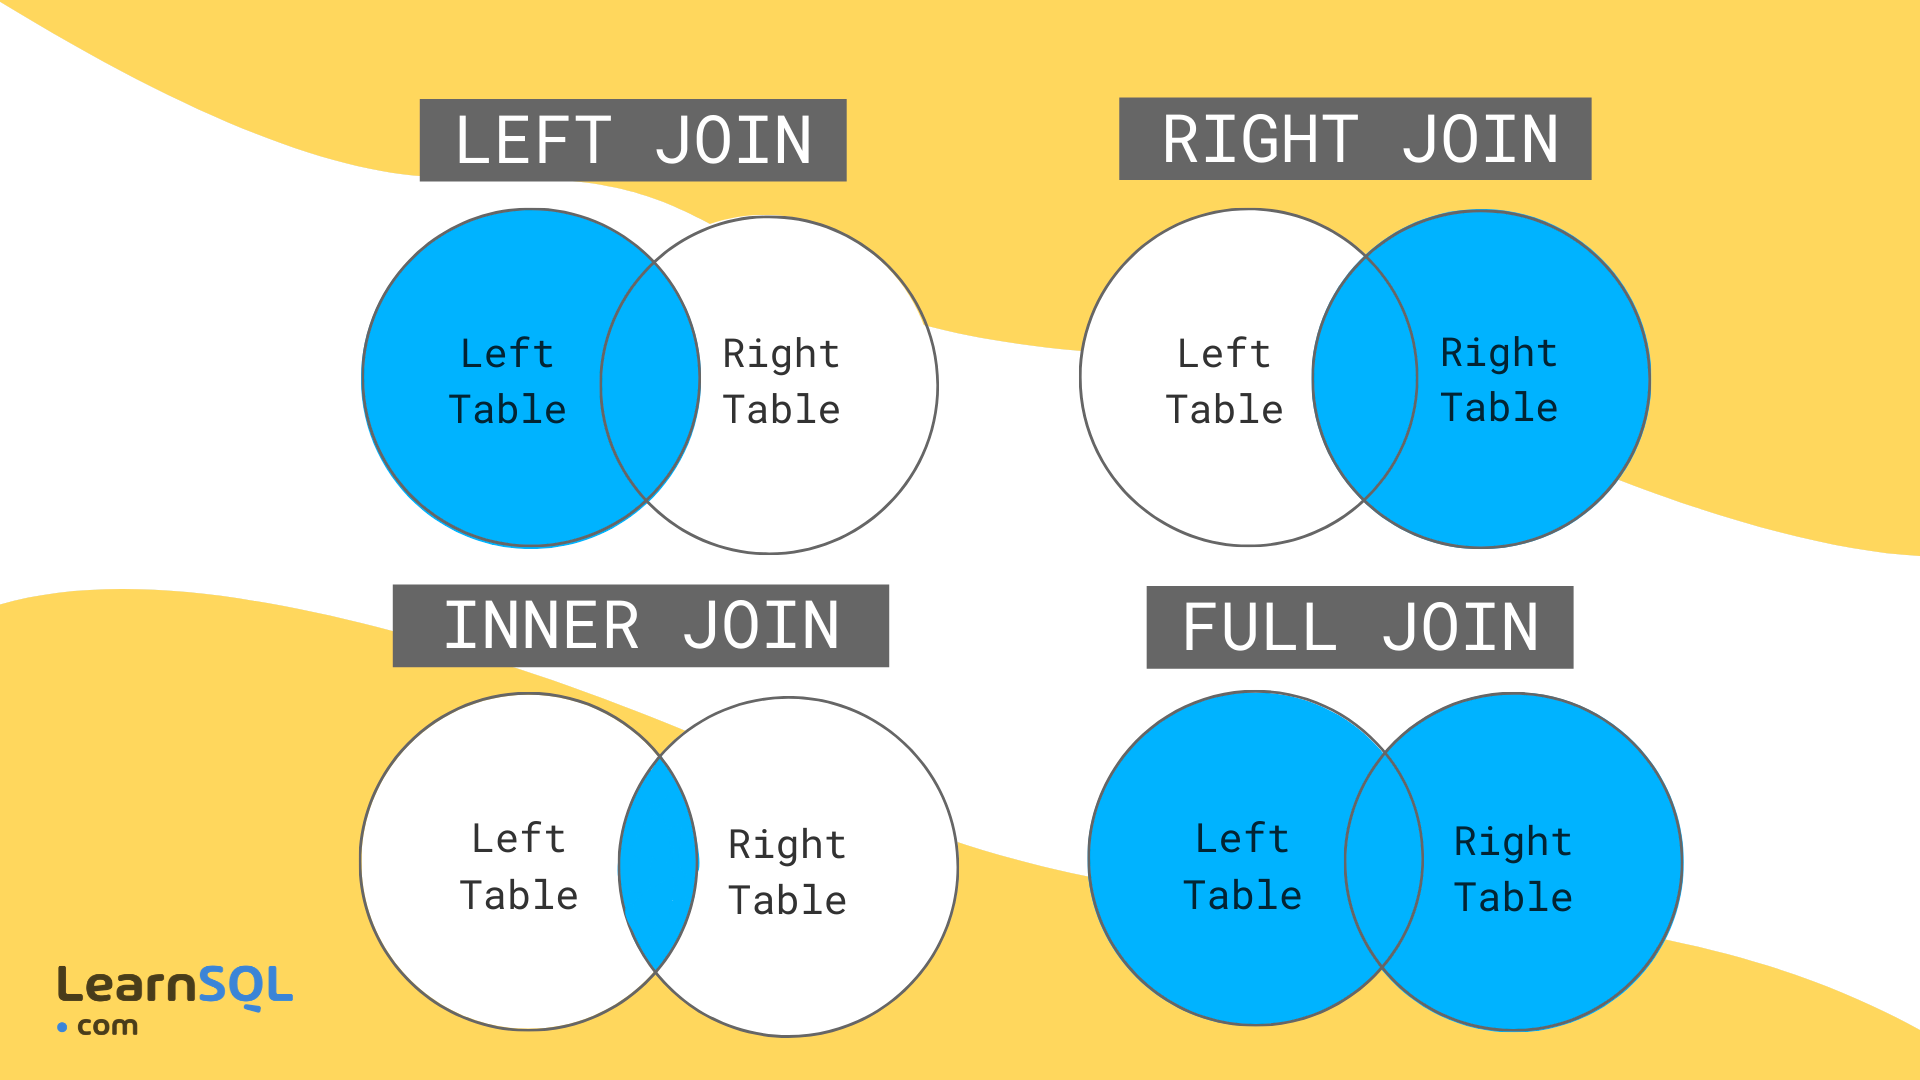

In [68]:
#### INNER JOIN #####
###  In SQLite, the INNER JOIN selects all rows from both participating tables
##   to appear in the result if and only if both tables meet the conditions specified
##  in the ON clause
## SELECT [result] from Tables [clausla de condicao ou comparacao]
## SELECT [results] from [ 1a Tabela] INNER JOIN [2a Tabela] ON [condicao de JOIN]

In [69]:
### Selecionar somente os Nomes dos empregados e os nomes dos departamentos

In [70]:
sql_inner_join = 'SELECT ename,dname FROM emp INNER JOIN dept ON emp.deptno = dept.deptno'
cursor.execute(sql_inner_join).fetchall()

[('SMITH', 'RESEARCH'),
 ('ALLEN', 'SALES'),
 ('WARD', 'SALES'),
 ('JONES', 'RESEARCH'),
 ('MARTIN', 'SALES'),
 ('BLAKE', 'SALES'),
 ('CLARK', 'ACCOUNTING'),
 ('SCOTT', 'RESEARCH'),
 ('KING', 'ACCOUNTING'),
 ('TURNER', 'SALES'),
 ('ADAMS', 'RESEARCH'),
 ('JAMES', 'SALES'),
 ('FORD', 'RESEARCH'),
 ('MILLER', 'ACCOUNTING')]

In [71]:
sql_inner_join = 'SELECT e.ename,d.dname FROM emp e INNER JOIN dept d ON e.deptno = d.deptno'
cursor.execute(sql_inner_join).fetchall()

[('SMITH', 'RESEARCH'),
 ('ALLEN', 'SALES'),
 ('WARD', 'SALES'),
 ('JONES', 'RESEARCH'),
 ('MARTIN', 'SALES'),
 ('BLAKE', 'SALES'),
 ('CLARK', 'ACCOUNTING'),
 ('SCOTT', 'RESEARCH'),
 ('KING', 'ACCOUNTING'),
 ('TURNER', 'SALES'),
 ('ADAMS', 'RESEARCH'),
 ('JAMES', 'SALES'),
 ('FORD', 'RESEARCH'),
 ('MILLER', 'ACCOUNTING')]

In [72]:
cursor.execute('PRAGMA table_info(emp)').fetchall()

[(0, 'EMPNO', 'INT', 0, None, 0),
 (1, 'ENAME', 'TEXT', 0, None, 0),
 (2, 'JOB', 'TEXT', 0, None, 0),
 (3, 'MGR', 'INT', 0, None, 0),
 (4, 'HIREDATE', 'date', 0, None, 0),
 (5, 'SAL', 'REAL', 0, None, 0),
 (6, 'COMM', 'INT', 0, None, 0),
 (7, 'DEPTNO', 'INT', 0, None, 0)]

In [73]:
### INSERT  PARA TESTAR LEFT OUTER####
sql_insert = 'INSERT INTO emp VALUES(20501,"CHARLES","ANALYST",2900,"08-20-2021",2000,10,50)'
cursor.execute(sql_insert)
cursor.execute('SELECT * FROM emp WHERE empno=20501').fetchall()

[(20501, 'CHARLES', 'ANALYST', 2900, '08-20-2021', 2000.0, 10, 50)]

In [74]:
sql_inner_join = 'SELECT ename,dname FROM emp INNER JOIN dept ON emp.deptno = dept.deptno'
cursor.execute(sql_inner_join).fetchall()

[('SMITH', 'RESEARCH'),
 ('ALLEN', 'SALES'),
 ('WARD', 'SALES'),
 ('JONES', 'RESEARCH'),
 ('MARTIN', 'SALES'),
 ('BLAKE', 'SALES'),
 ('CLARK', 'ACCOUNTING'),
 ('SCOTT', 'RESEARCH'),
 ('KING', 'ACCOUNTING'),
 ('TURNER', 'SALES'),
 ('ADAMS', 'RESEARCH'),
 ('JAMES', 'SALES'),
 ('FORD', 'RESEARCH'),
 ('MILLER', 'ACCOUNTING')]

In [75]:
#### LEFT OUTER JOIN ####
###  The Left Join or Left Outer Join operation takes two relations, A and B, and returns
###  the inner join of A and B along with the unmatched rows of A
## SELECT [results] from [ 1a Tabela] LEFT JOIN [2a Tabela] ON [condicao de JOIN]

In [76]:
sql_left_join = 'SELECT ename,dname FROM emp LEFT JOIN dept ON emp.deptno = dept.deptno'
cursor.execute(sql_left_join).fetchall()

[('SMITH', 'RESEARCH'),
 ('ALLEN', 'SALES'),
 ('WARD', 'SALES'),
 ('JONES', 'RESEARCH'),
 ('MARTIN', 'SALES'),
 ('BLAKE', 'SALES'),
 ('CLARK', 'ACCOUNTING'),
 ('SCOTT', 'RESEARCH'),
 ('KING', 'ACCOUNTING'),
 ('TURNER', 'SALES'),
 ('ADAMS', 'RESEARCH'),
 ('JAMES', 'SALES'),
 ('FORD', 'RESEARCH'),
 ('MILLER', 'ACCOUNTING'),
 ('CHARLES', None)]

In [77]:
sql_left_join = 'SELECT ename,dname FROM emp RIGHT JOIN dept ON emp.deptno = dept.deptno'
cursor.execute(sql_left_join).fetchall()

[('SMITH', 'RESEARCH'),
 ('ALLEN', 'SALES'),
 ('WARD', 'SALES'),
 ('JONES', 'RESEARCH'),
 ('MARTIN', 'SALES'),
 ('BLAKE', 'SALES'),
 ('CLARK', 'ACCOUNTING'),
 ('SCOTT', 'RESEARCH'),
 ('KING', 'ACCOUNTING'),
 ('TURNER', 'SALES'),
 ('ADAMS', 'RESEARCH'),
 ('JAMES', 'SALES'),
 ('FORD', 'RESEARCH'),
 ('MILLER', 'ACCOUNTING'),
 (None, 'OPERATIONS')]

In [78]:
#### CROSS JOIN or CARTESIAN JOIN ####
###  The Cartesian join is one of the fundamental relational operations.
###  It is a kind of join that results in the combination of all rows from the
##   first table with all rows in the second.

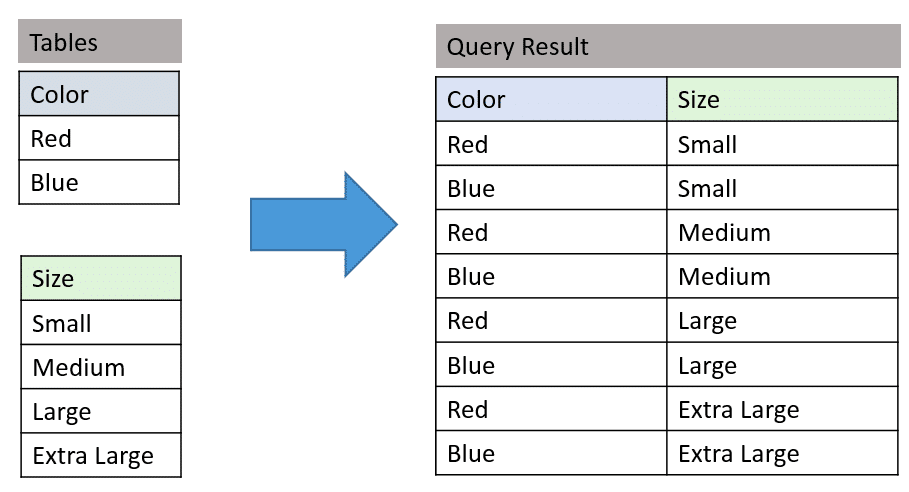

In [79]:
## SELECT [results] from [ 1a Tabela] CROSS JOIN [2a Tabela]
sql_CROSSJOIN = 'SELECT * FROM emp CROSS JOIN dept'
data = cursor.execute(sql_CROSSJOIN).fetchall()
for row in data:
  print(row)

(7369, 'SMITH', 'CLERK', 7902, '2005-12-11', 880.0000000000001, 150, 20, 10, 'ACCOUNTING', 'NEW YORK')
(7369, 'SMITH', 'CLERK', 7902, '2005-12-11', 880.0000000000001, 150, 20, 20, 'RESEARCH', 'DALLAS')
(7369, 'SMITH', 'CLERK', 7902, '2005-12-11', 880.0000000000001, 150, 20, 30, 'SALES', 'CHICAGO')
(7369, 'SMITH', 'CLERK', 7902, '2005-12-11', 880.0000000000001, 150, 20, 40, 'OPERATIONS', 'BOSTON')
(7499, 'ALLEN', 'SALESMAN', 7698, '2006-02-23', 1600.0, 300, 30, 10, 'ACCOUNTING', 'NEW YORK')
(7499, 'ALLEN', 'SALESMAN', 7698, '2006-02-23', 1600.0, 300, 30, 20, 'RESEARCH', 'DALLAS')
(7499, 'ALLEN', 'SALESMAN', 7698, '2006-02-23', 1600.0, 300, 30, 30, 'SALES', 'CHICAGO')
(7499, 'ALLEN', 'SALESMAN', 7698, '2006-02-23', 1600.0, 300, 30, 40, 'OPERATIONS', 'BOSTON')
(7521, 'WARD', 'SALESMAN', 7698, '2006-02-26', 1250.0, 500, 30, 10, 'ACCOUNTING', 'NEW YORK')
(7521, 'WARD', 'SALESMAN', 7698, '2006-02-26', 1250.0, 500, 30, 20, 'RESEARCH', 'DALLAS')
(7521, 'WARD', 'SALESMAN', 7698, '2006-02-26', 1

In [80]:
sql_create ='create table emp_bonus(empno int, received date, type int)'
cursor.execute(sql_create)
cursor.execute('PRAGMA table_info(emp_bonus)').fetchall()

[(0, 'empno', 'INT', 0, None, 0),
 (1, 'received', 'date', 0, None, 0),
 (2, 'type', 'INT', 0, None, 0)]

In [81]:
cursor.execute('PRAGMA table_info(emp_bonus)').fetchall()

[(0, 'empno', 'INT', 0, None, 0),
 (1, 'received', 'date', 0, None, 0),
 (2, 'type', 'INT', 0, None, 0)]

In [82]:
bonus_list = [(7369,'02-MAR-2001',1),(7900,'23-MAY-2020',2),(7788,'01-JAN-2010',1)]
sql_insert = 'insert into emp_bonus values(?,?,?)'
cursor.executemany(sql_insert,bonus_list)
cursor.execute('select * from emp_bonus').fetchall()

[(7369, '02-MAR-2001', 1), (7900, '23-MAY-2020', 2), (7788, '01-JAN-2010', 1)]

In [83]:
cursor.execute("SELECT * FROM emp").fetchall()

[(7369, 'SMITH', 'CLERK', 7902, '2005-12-11', 880.0000000000001, 150, 20),
 (7499, 'ALLEN', 'SALESMAN', 7698, '2006-02-23', 1600.0, 300, 30),
 (7521, 'WARD', 'SALESMAN', 7698, '2006-02-26', 1250.0, 500, 30),
 (7566, 'JONES', 'MANAGER', 7839, '2006-04-02', 3272.5000000000005, 520, 20),
 (7654, 'MARTIN', 'SALESMAN', 7698, '2006-09-28', 1400.0, 420, 30),
 (7698, 'BLAKE', 'MANAGER', 7839, '2006-05-1', 2850.0, 600, 30),
 (7782, 'CLARK', 'MANAGER', 7839, '2006-06-09', 2450.0, 580, 10),
 (7788, 'SCOTT', 'ANALYST', 7566, '2007-12-09', 3300.0000000000005, 640, 20),
 (7839, 'KING', 'PRESIDENT', '', '2006-11-17', 5000.0, 0, 10),
 (7844, 'TURNER', 'SALESMAN', 7698, '2006-09-13', 1500.0, 0, 30),
 (7876, 'ADAMS', 'CLERK', 7788, '2008-01-12', 1210.0, 50, 20),
 (7900, 'JAMES', 'CLERK', 7698, '2006-12-03', 950.0, 40, 30),
 (7902, 'FORD', 'ANALYST', 7566, '2006-12-03', 3300.0000000000005, 10, 20),
 (7934, 'MILLER', 'CLERK', 7782, '2007-01-23', 1300.0, '', 10),
 (20501, 'CHARLES', 'ANALYST', 2900, '08-20

In [84]:
sql_multiple_joins = 'select e.ename, d.loc, b.received from emp e\
                        INNER JOIN dept d\
                        ON (e.deptno = d.deptno)\
                        LEFT JOIN emp_bonus b\
                        ON (e.empno = b.empno) order by 2'

cursor.execute(sql_multiple_joins).fetchall()

[('ALLEN', 'CHICAGO', None),
 ('WARD', 'CHICAGO', None),
 ('MARTIN', 'CHICAGO', None),
 ('BLAKE', 'CHICAGO', None),
 ('TURNER', 'CHICAGO', None),
 ('JAMES', 'CHICAGO', '23-MAY-2020'),
 ('SMITH', 'DALLAS', '02-MAR-2001'),
 ('JONES', 'DALLAS', None),
 ('SCOTT', 'DALLAS', '01-JAN-2010'),
 ('ADAMS', 'DALLAS', None),
 ('FORD', 'DALLAS', None),
 ('CLARK', 'NEW YORK', None),
 ('KING', 'NEW YORK', None),
 ('MILLER', 'NEW YORK', None)]